<table border="0" style="width:100%">
 <tr>
    <td>
        <img src="https://static-frm.ie.edu/university/wp-content/uploads/sites/6/2022/06/IE-University-logo.png" width=150>
     </td>
    <td><div style="font-family:'Courier New'">
            <div style="font-size:25px">
                <div style="text-align: right"> 
                    <b> MASTER IN BIG DATA</b>
                    <br>
                    Python for Data Analysis I
                    <br><br>
                    <em> Daniel Sierra Ramos </em>
                </div>
            </div>
        </div>
    </td>
 </tr>
</table>

# CHAPTER II: Insights

In this chapter, we will work with the *Churn* dataset. This data contains information about the customers of a telecommunications company. It contains typical info a company have about its customers and also a binary column called "churn" that stores information about if the customer churned or not. _In order to prevent churn, the CIO of this company is very interested in knowing how the information they have about their customers is related to the churn action_.

Open-ended question. Maximum points for the usage of Pandas, conversion to JSON also allowed, exploration of several methods encouraged. More complex and innovative approaches get a higher grade.

You can enrich your analysis with Pandas methods and techniques not seen in class, but libraries other than Pandas are not allowed for data manipulation.

All the insights should be supported with graphs built with any of the plotting libraries seen in class or others. Feel free to innovate in this part in order to clearly show the value of your insights.

**Submission format:** One Jupyter notebook (`GroupX_Assignment2_C2.ipynb`).

**Grading criteria** are:

- Code contains the 5 insights (40 %)
- Code has no errors, uses meaningful and explanatory variable names, and is clean and concise (10 %).
- Quality of the insights. Notebook cleanliness. No commented code that is not working. Markdown annotations are encouraged. The result should be apt for the CIO's technical team. (50 %)

## Question 6

**Present at least 5 insights** about the dataset. You can relate 2, 3, or whatever number of variables to describe something exciting about data. The more complex and interesting the insight, the more grades.

Paste a summary below (one sentence per insight), and include the entire code, explanations, and discussion in the original notebook.

## Table of Content

1. [Imports](#imports)
    1. Libraries
    1. Load the Dataset
1. [Data Overview](#data-overview)
1. [Data Preprocessing (Cleaning)](#data-cleaning)
    1. Missing Values
    1. Data Types
1. Exploratory Data Analysis

## 1. Imports

### 1.1 Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

/Users/cesargarcia/Desktop/Python for Data Analysis/venvtest/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1.2 Loading the Dataset

In [98]:
filepath = "data/churn.csv"
df = pd.read_csv(filepath)

## 2. Data Overview <a name="data-overview"></a>

In this section, we provide an overview of the dataset by displaying the first few rows, examining the data types, and exploring each column along with a sample of their unique values. This exploration aims to give us a sense of the available information and helps us plan the necessary steps for analysis.

In this project our aim is to know information about customer churn action, so as a last step we take a look at the class distribution of the predictor variable `Churn` in the database. There is no significant class inbalance.

### 2.1 Head

In [59]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2 Data Types and Missing Values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2.3 Columns and Unique Values

In [58]:
for column in df.columns:
    col_name = (column + ": ").ljust(20, " ")
    print(col_name, *df[column].unique()[0:5], sep="\t", end="\n")

customerID:         	7590-VHVEG	5575-GNVDE	3668-QPYBK	7795-CFOCW	9237-HQITU
gender:             	Female	Male
SeniorCitizen:      	0	1
Partner:            	Yes	No
Dependents:         	No	Yes
tenure:             	1	34	2	45	8
PhoneService:       	No	Yes
MultipleLines:      	No phone service	No	Yes
InternetService:    	DSL	Fiber optic	No
OnlineSecurity:     	No	Yes	No internet service
OnlineBackup:       	Yes	No	No internet service
DeviceProtection:   	No	Yes	No internet service
TechSupport:        	No	Yes	No internet service
StreamingTV:        	No	Yes	No internet service
StreamingMovies:    	No	Yes	No internet service
Contract:           	Month-to-month	One year	Two year
PaperlessBilling:   	Yes	No
PaymentMethod:      	Electronic check	Mailed check	Bank transfer (automatic)	Credit card (automatic)
MonthlyCharges:     	29.85	56.95	53.85	42.3	70.7
TotalCharges:       	29.85	1889.5	108.15	1840.75	151.65
Churn:              	No	Yes


### 2.4 Class Balance of Predictor Variable 

In [24]:
#filtered_data = df[df['StreamingMovies'] == 'No']
#filtered_data['Churn'].value_counts() / len(filtered_data) *100
df['Churn'].value_counts() / len(df) *100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

## 3. Data Preprocessing

### 3.1 Check for duplicate values

In [100]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 21)


### 3.2 Transformations

Drop variables that do not provide any meaningful information for predicting churn

In [89]:
#Dropping customerID because it does not give any information
df.drop('customerID', axis=1, inplace=True)

#Maybe drop gender for ethical reasons
#df.drop('gender', axis=1, inplace=True)


#### Variable Encoding

In [90]:
# Replace values for variables that have 'Yes' or 'No' values. Also replace gender with 0 or 1.
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)
df['Partner'].replace({'Yes': 1, 'No': 0}, inplace=True)
df['Dependents'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['PhoneService'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['PaperlessBilling'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)

#Combining internet services so that we have a binary variable for customers with internet service
df['InternetService'].replace({'No': 0, 'DSL': 1, 'Fiber optic': 1}, inplace=True)

# Values that depend on InternetService being Yes or No. If the customer does not have internet service, then it will also be No for these variables.
df['OnlineSecurity'].replace({'No': 0, 'Yes': 1, 'No internet service': 0}, inplace=True)
df['DeviceProtection'].replace({'No': 0, 'Yes': 1, 'No internet service': 0}, inplace=True)
df['TechSupport'].replace({'No': 0, 'Yes': 1, 'No internet service': 0}, inplace=True)
df['StreamingTV'].replace({'No': 0, 'Yes': 1, 'No internet service': 0}, inplace=True)
df['StreamingMovies'].replace({'No': 0, 'Yes': 1, 'No internet service': 0}, inplace=True)
df['OnlineBackup'].replace({'No': 0, 'Yes': 1, 'No internet service': 0}, inplace=True)

# Same but for phone service
df['MultipleLines'].replace({'No phone service': 0, 'No': 0, 'Yes': 1}, inplace=True)

#df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2}, inplace=True)

# One-hot encode 'InternetService'
#df = pd.get_dummies(df, columns=['InternetService'], prefix='InternetService', drop_first=True)

#### Data Type Updates

In [91]:
# Convert 'TotalCharges' to numeric, coerce errors to handle any non-convertible values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert binary variables to boolean
binary_vars = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',  'PaperlessBilling', 'Churn']
df[binary_vars] = df[binary_vars].astype(bool)


Creating New Variables

In [95]:
df['ServiceBundle'] = df['OnlineSecurity'] + df['OnlineBackup'] + df['DeviceProtection'] + df['TechSupport'] + df['StreamingTV'] + df['StreamingMovies']
df['UsageIntensity'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)  # Adding 1 to avoid division by zero
df['Contract_Paperless'] = df['Contract'] * df['PaperlessBilling']
df['StreamingServices'] = df['StreamingTV'] | df['StreamingMovies']
df['PhoneInternetBundle'] = df['PhoneService'] & (df['InternetService'])


### 3.X Final Dataset Structure

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7043 non-null   bool   
 1   SeniorCitizen        7043 non-null   bool   
 2   Partner              7043 non-null   bool   
 3   Dependents           7043 non-null   bool   
 4   tenure               7043 non-null   int64  
 5   PhoneService         7043 non-null   bool   
 6   MultipleLines        7043 non-null   bool   
 7   InternetService      7043 non-null   bool   
 8   OnlineSecurity       7043 non-null   bool   
 9   OnlineBackup         7043 non-null   int64  
 10  DeviceProtection     7043 non-null   bool   
 11  TechSupport          7043 non-null   bool   
 12  StreamingTV          7043 non-null   bool   
 13  StreamingMovies      7043 non-null   bool   
 14  Contract             7043 non-null   object 
 15  PaperlessBilling     7043 non-null   b

## 4. Exploratory Data Analysis

### Statistical Report

In [96]:
profile = ProfileReport(df)
profile.to_file("churn.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 204.92it/s]


### Other Stats

Churn
False    61.265124
True     74.441332
Name: MonthlyCharges, dtype: float64


<Axes: xlabel='Churn', ylabel='Monthly Charges'>

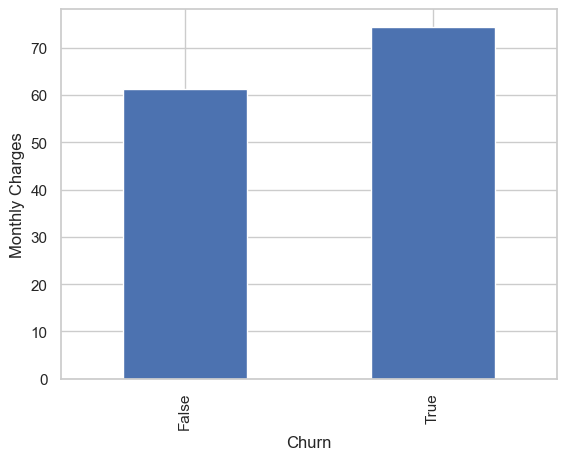

In [97]:
# Assume df is your DataFrame with 'Churn' and 'MonthlyCharges' columns
churn_groups = df.groupby('Churn')['MonthlyCharges']

# Calculate group means
group_means = churn_groups.mean()

# Print or plot the group means
print(group_means)

# Visualize the group means (optional)
group_means.plot(kind='bar', ylabel='Monthly Charges')
